In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

from openbb_terminal.sdk import openbb, TerminalStyle
theme = TerminalStyle("dark", "dark", "dark")
## 가이드 문서 https://docs.openbb.co/sdk/usage/intros


# 시각화 도구
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='space')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (5,3)

## Data

In [14]:
## Dataload
data = openbb.stocks.load('QQQ', start_date = '1990-01-01')
## feat_engine
## data = openbb.forecast.atr(dataset = data, high_column='High', low_column = 'Low', close_column = 'Adj Close')
data = openbb.forecast.delta(dataset = data, target_column='Adj Close')
## data = openbb.forecast.signal(dataset = data, target_column = 'Adj Close')

## data = openbb.forecast.ema(dataset = data, target_column='Adj Close', period = 20)
## data = openbb.forecast.ema(dataset = data, target_column='Adj Close', period = 60)
## data = openbb.forecast.ema(dataset = data, target_column='Adj Close', period = 120)

## data = openbb.forecast.mom(dataset = data, target_column = 'Adj Close', period = 20)
## data = openbb.forecast.mom(dataset = data, target_column = 'Adj Close', period = 60)
## data = openbb.forecast.mom(dataset = data, target_column = 'Adj Close', period = 120)

## data = openbb.forecast.roc(dataset = data, target_column = 'Adj Close', period = 20)
## data = openbb.forecast.roc(dataset = data, target_column = 'Adj Close', period = 60)
## data = openbb.forecast.roc(dataset = data, target_column = 'Adj Close', period = 120)

## data = openbb.forecast.rsi(dataset = data, target_column = 'Adj Close', period = 20)
## data = openbb.forecast.rsi(dataset = data, target_column = 'Adj Close', period = 60)
## data = openbb.forecast.rsi(dataset = data, target_column = 'Adj Close', period = 120)

## data = openbb.forecast.sto(dataset = data, high_column='High', low_column = 'Low', close_column = 'Adj Close', period = 20)
## data = openbb.forecast.sto(dataset = data, high_column='High', low_column = 'Low', close_column = 'Adj Close', period = 60)
## data = openbb.forecast.sto(dataset = data, high_column='High', low_column = 'Low', close_column = 'Adj Close', period = 120)

Loading Daily data for QQQ with starting period 1999-03-10.

## Transformer

In [ ]:
trans_fore = openbb.forecast.tft(data = data,
                                target_column = 'delta_Adj Close',
                                n_predict = 5,
                                train_split = 0.85,
                                past_covariates = None,
                                forecast_horizon = 5,
                                input_chunk_length = 14,
                                output_chunk_length = 5,
                                hidden_size = 16,
                                lstm_layers = 16,
                                full_attention = False,
                                dropout = 0.1,
                                hidden_continuous_size = 8,
                                n_epochs = 10,
                                batch_size = 16,
                                force_reset =  True,
                                save_checkpoints = True,
                                metric = "mape")

In [21]:
ori = pd.DataFrame(trans_fore[0].values(), index = trans_fore[0].time_index, columns=['Origin'])
pred = pd.DataFrame(trans_fore[1].values(), index = trans_fore[1].time_index, columns=['Prediction'])
fore = pd.DataFrame(trans_fore[2].values(), index = trans_fore[2].time_index, columns=['Forecast'])
trans_fore_result = pd.concat([ori, pred, fore], axis=1)

IndexError: list index out of range

In [12]:
trans_fore_result.tail(50).iplot()

<Axes: >

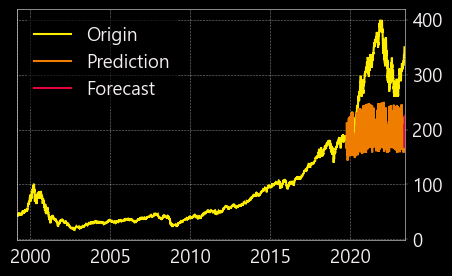

In [13]:
trans_fore_result.plot()